In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('income.csv',names=['income','count'],skiprows=1)
df.sample(5)

,income,count
3,20000,6047
9,50000,4991
16,85000,3565
18,95000,2753
10,55000,5152


In [3]:
xt=np.arange(len(df))
xt

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

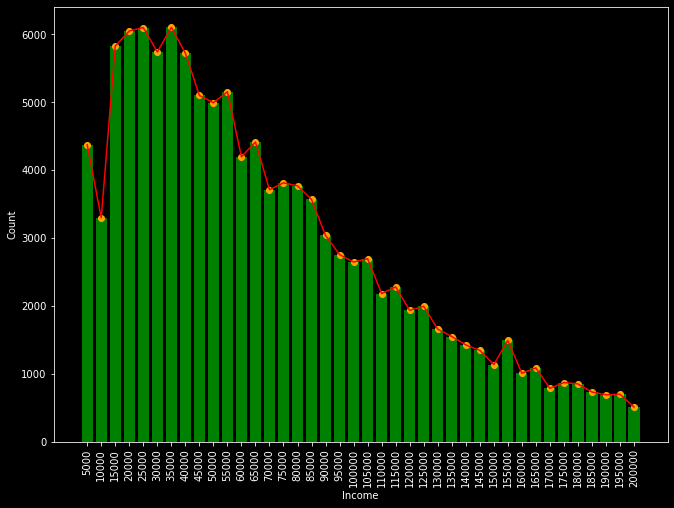

In [4]:
plt.figure(figsize=(11, 8))
plt.xticks(xt,df['income'],rotation=90)
plt.bar(xt,df['count'],color='green')
plt.plot(xt,df['count'],color='red')
plt.scatter(xt,df['count'],color='orange')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [5]:
def log_function(x):
    return round(math.log(x,10),1)

In [6]:
df['log income']=df['income'].apply(log_function)

In [7]:
df.sample(5)

,income,count,log income
15,80000,3766,4.9
33,170000,784,5.2
37,190000,688,5.3
17,90000,3035,5.0
11,60000,4194,4.8


In [8]:
rounded_values=np.arange(3.5,6,0.5)
rounded_values=list(rounded_values)
rounded_values

[3.5, 4.0, 4.5, 5.0, 5.5]

In [9]:
df

,income,count,log income
0,5000,4371,3.7
1,10000,3295,4.0
2,15000,5825,4.2
3,20000,6047,4.3
4,25000,6097,4.4
5,30000,5738,4.5
6,35000,6100,4.5
7,40000,5720,4.6
8,45000,5098,4.7
9,50000,4991,4.7


In [10]:
def categorization(x):
    x1=math.floor(x)
    d=x-x1
    if d<0.25:
        return x1
    elif d>=0.25 and d<=0.75:
        return x1+0.5
    else:
        return x1+1

In [11]:
df['log income round']=df['log income'].apply(categorization)
df

,income,count,log income,log income round
0,5000,4371,3.7,3.5
1,10000,3295,4.0,4.0
2,15000,5825,4.2,4.0
3,20000,6047,4.3,4.5
4,25000,6097,4.4,4.5
5,30000,5738,4.5,4.5
6,35000,6100,4.5,4.5
7,40000,5720,4.6,4.5
8,45000,5098,4.7,4.5
9,50000,4991,4.7,4.5


In [12]:
df['log income round'].value_counts()

5.0    24
4.5     8
5.5     5
4.0     2
3.5     1
Name: log income round, dtype: int64

In [17]:
x2=df['log income round'].value_counts()
x2=list(dict(x2).keys())

In [30]:
x2.sort()
x2

[3.5, 4.0, 4.5, 5.0, 5.5]

In [22]:
df1=df.groupby('log income round').sum()

In [26]:
p=[]
for i in x2:
    p.append(df1['count'][i])
    
p

[4371, 9120, 44943, 55298, 3472]

In [31]:
for i in range(len(x2)):
    x2[i]=str(x2[i])
x2

['3.5', '4.0', '4.5', '5.0', '5.5']

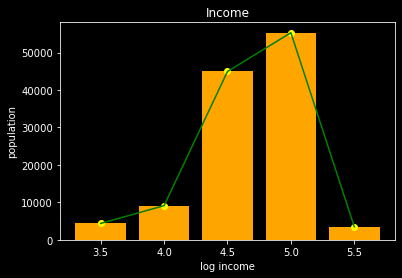

In [32]:
plt.bar(x2,p,color='orange')
plt.plot(x2,p,color='green')
plt.scatter(x2,p,color='yellow')
plt.xlabel('log income')
plt.ylabel('population')
plt.title('Income')
plt.show()